<center><u><H1>Gradient Boost-XGBoost</H1></u></center>

## Installation:
- pip install xgboost

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()
X=iris.data
y=iris.target

## Preprocessing the data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019)

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Creating models

### Decision Trees

In [5]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [6]:
dt = dt.fit(X_train_std, y_train)

In [7]:
dt_test_pred = dt.predict(X_test_std)

### AdaBoost 

In [8]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=500, learning_rate=0.05, random_state=2019)

In [9]:
ada = ada.fit(X_train_std, y_train)

In [10]:
ada_test_pred = ada.predict(X_test_std)

## Gradient Boost

In [11]:
gb = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.05, random_state=2019)

In [12]:
gb = gb.fit(X_train_std, y_train)

In [13]:
gb_test_pred = gb.predict(X_test_std)

### XGBoost

In [14]:
xgb = xgb.XGBClassifier(objective="multi:softprob", 
                        max_depth=3,
                        n_estimators=500,
                        eta=0.1,
                        random_state=2019,
                        ) #objective="binary:logistic"

In [15]:
xgb = xgb.fit(X_train_std, y_train)

In [16]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=2019,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
xgb_test_pred = xgb.predict(X_test_std)

## Metrics:

### Decision Trees

In [18]:
dt_test = accuracy_score(y_test, dt_test_pred)

print(f"Decision Tree: Test accuracy: {dt_test:.3f}")

Decision Tree: Test accuracy: 0.978


In [19]:
print(f"Confusion Matrix\n{confusion_matrix(y_test, dt_test_pred)}")

Confusion Matrix
[[19  0  0]
 [ 0  9  1]
 [ 0  0 16]]


In [20]:
scores = cross_val_score(dt, X_std, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]


In [21]:
print(f"Cross Val Scores Mean:{scores.mean()} / Cross Val Scores Std:{scores.std()}")

Cross Val Scores Mean:0.96 / Cross Val Scores Std:0.03265986323710903


### AdaBoost

In [22]:
ada_test = accuracy_score(y_test, ada_test_pred)

print(f"AdaBoost: Test accuracy: {ada_test:.3f}")

AdaBoost: Test accuracy: 0.978


In [23]:
print(f"Confusion Matrix\n{confusion_matrix(y_test, ada_test_pred)}")

Confusion Matrix
[[19  0  0]
 [ 0  9  1]
 [ 0  0 16]]


In [24]:
scores = cross_val_score(ada, X_std, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [25]:
print(f"Cross Val Scores Mean:{scores.mean()} / Cross Val Scores Std:{scores.std()}")

Cross Val Scores Mean:0.9666666666666666 / Cross Val Scores Std:0.033333333333333326


### Gradient Boost

In [26]:
gb_test = accuracy_score(y_test, gb_test_pred)

print(f"AdaBoost: Test accuracy: {gb_test:.3f}")

AdaBoost: Test accuracy: 0.956


In [27]:
print(f"Confusion Matrix\n{confusion_matrix(y_test, gb_test_pred)}")

Confusion Matrix
[[19  0  0]
 [ 0  9  1]
 [ 0  1 15]]


In [28]:
scores = cross_val_score(gb, X_std, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


In [29]:
print(f"Cross Val Scores Mean:{scores.mean()} / Cross Val Scores Std:{scores.std()}")

Cross Val Scores Mean:0.96 / Cross Val Scores Std:0.044221663871405324


### XGBoost

In [30]:
xgb_test = accuracy_score(y_test, xgb_test_pred)

print(f"XGBoost: Test accuracy: {xgb_test:.3f}")

XGBoost: Test accuracy: 0.978


In [31]:
print(f"Confusion Matrix\n{confusion_matrix(y_test, xgb_test_pred)}")

Confusion Matrix
[[19  0  0]
 [ 0  9  1]
 [ 0  0 16]]


In [32]:
scores = cross_val_score(xgb, X_std, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]


In [33]:
print(f"Cross Val Scores Mean:{scores.mean()} / Cross Val Scores Std:{scores.std()}")

Cross Val Scores Mean:0.96 / Cross Val Scores Std:0.03265986323710903


## Plotting data

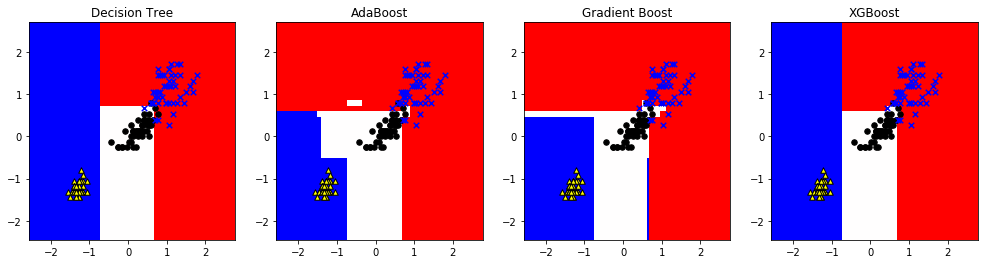

In [34]:
fig, axs = plt.subplots(1, 4, figsize=(17, 4))
res = 0.02
X2D = X_std[:,[2,3]]

x1min, x1max = X2D[:,0].min() -1, X2D[:,0].max() + 1
x2min, x2max = X2D[:,1].min() -1, X2D[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

for clf, ax, title in zip([dt, ada, gb, xgb], axs, ['Decision Tree','AdaBoost','Gradient Boost','XGBoost']):
    clf.fit(X2D, y)
    output = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    ax.pcolormesh(xx1,xx2, output, cmap=plt.cm.bwr)
    ax.scatter(X2D[y==0, 0], X2D[y==0, 1], s=30, color='yellow', marker='^', edgecolor='k')
    ax.scatter(X2D[y==1, 0], X2D[y==1, 1], s=30, color='black', marker='o', edgecolor='k')
    ax.scatter(X2D[y==2, 0], X2D[y==2, 1], s=30, color='blue', marker='x', edgecolor='k')
    ax.set_title(title)

## Reference:
https://xgboost.readthedocs.io/en/latest/parameter.html

https://xgboost.readthedocs.io/en/latest/index.html